In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("/content/diabetes[1].csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.drop(columns=["SkinThickness","Insulin"],inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [11]:
df.shape

(768, 7)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies', ylabel='Count'>

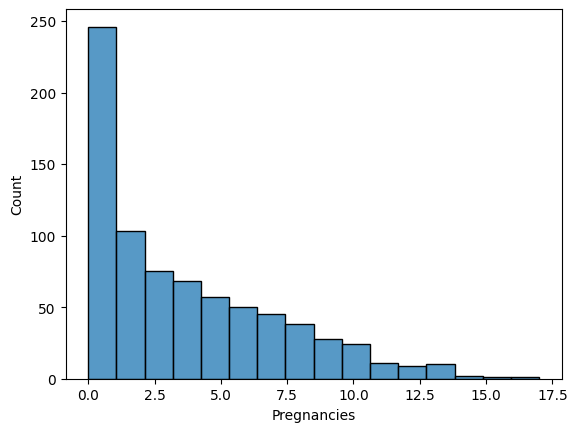

In [13]:
sns.histplot(df["Pregnancies"])


<Axes: xlabel='Glucose', ylabel='Count'>

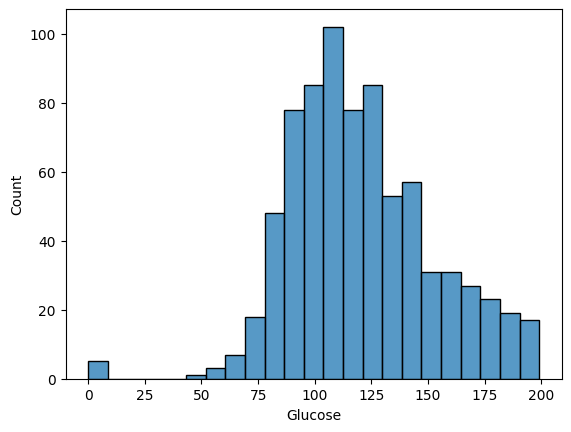

In [14]:
sns.histplot(df['Glucose'])


Zeros in Glucose: 5

Zeros in BloodPressure: 35

Zeros in BMI: 11


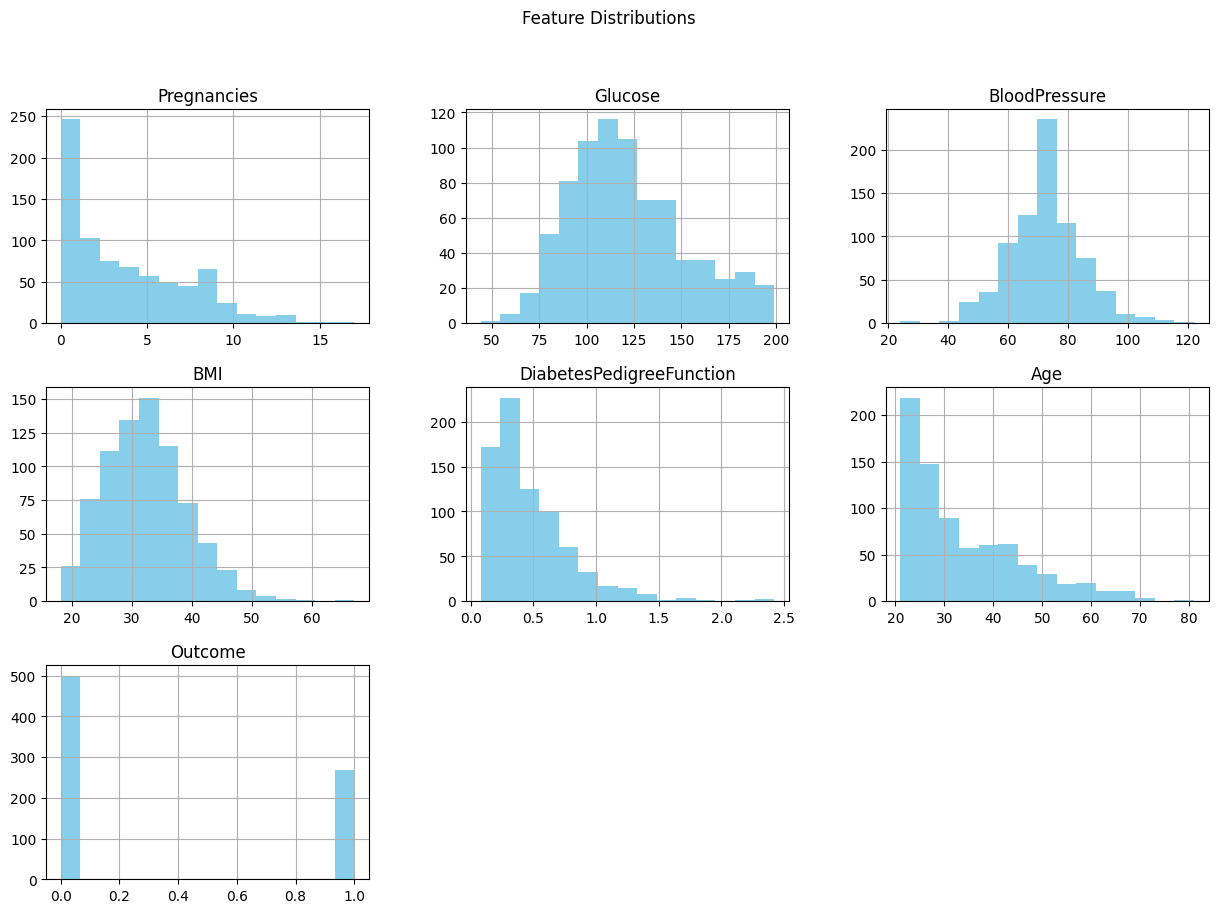

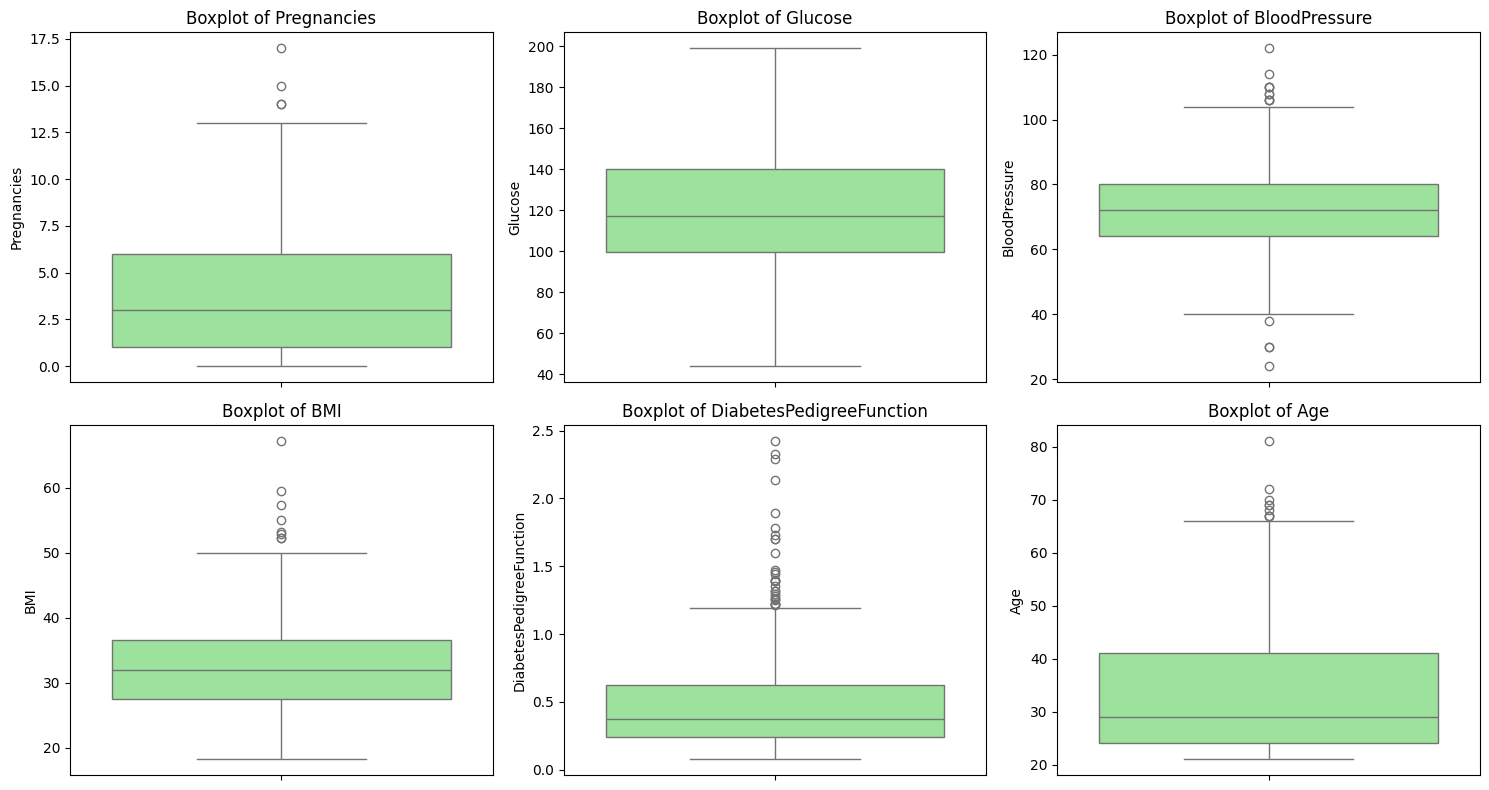

/tmp/ipython-input-2652015135.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


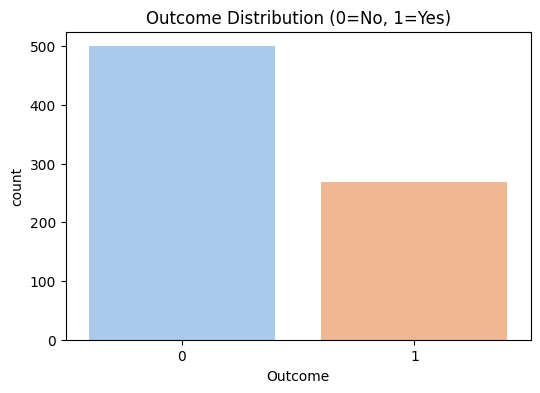

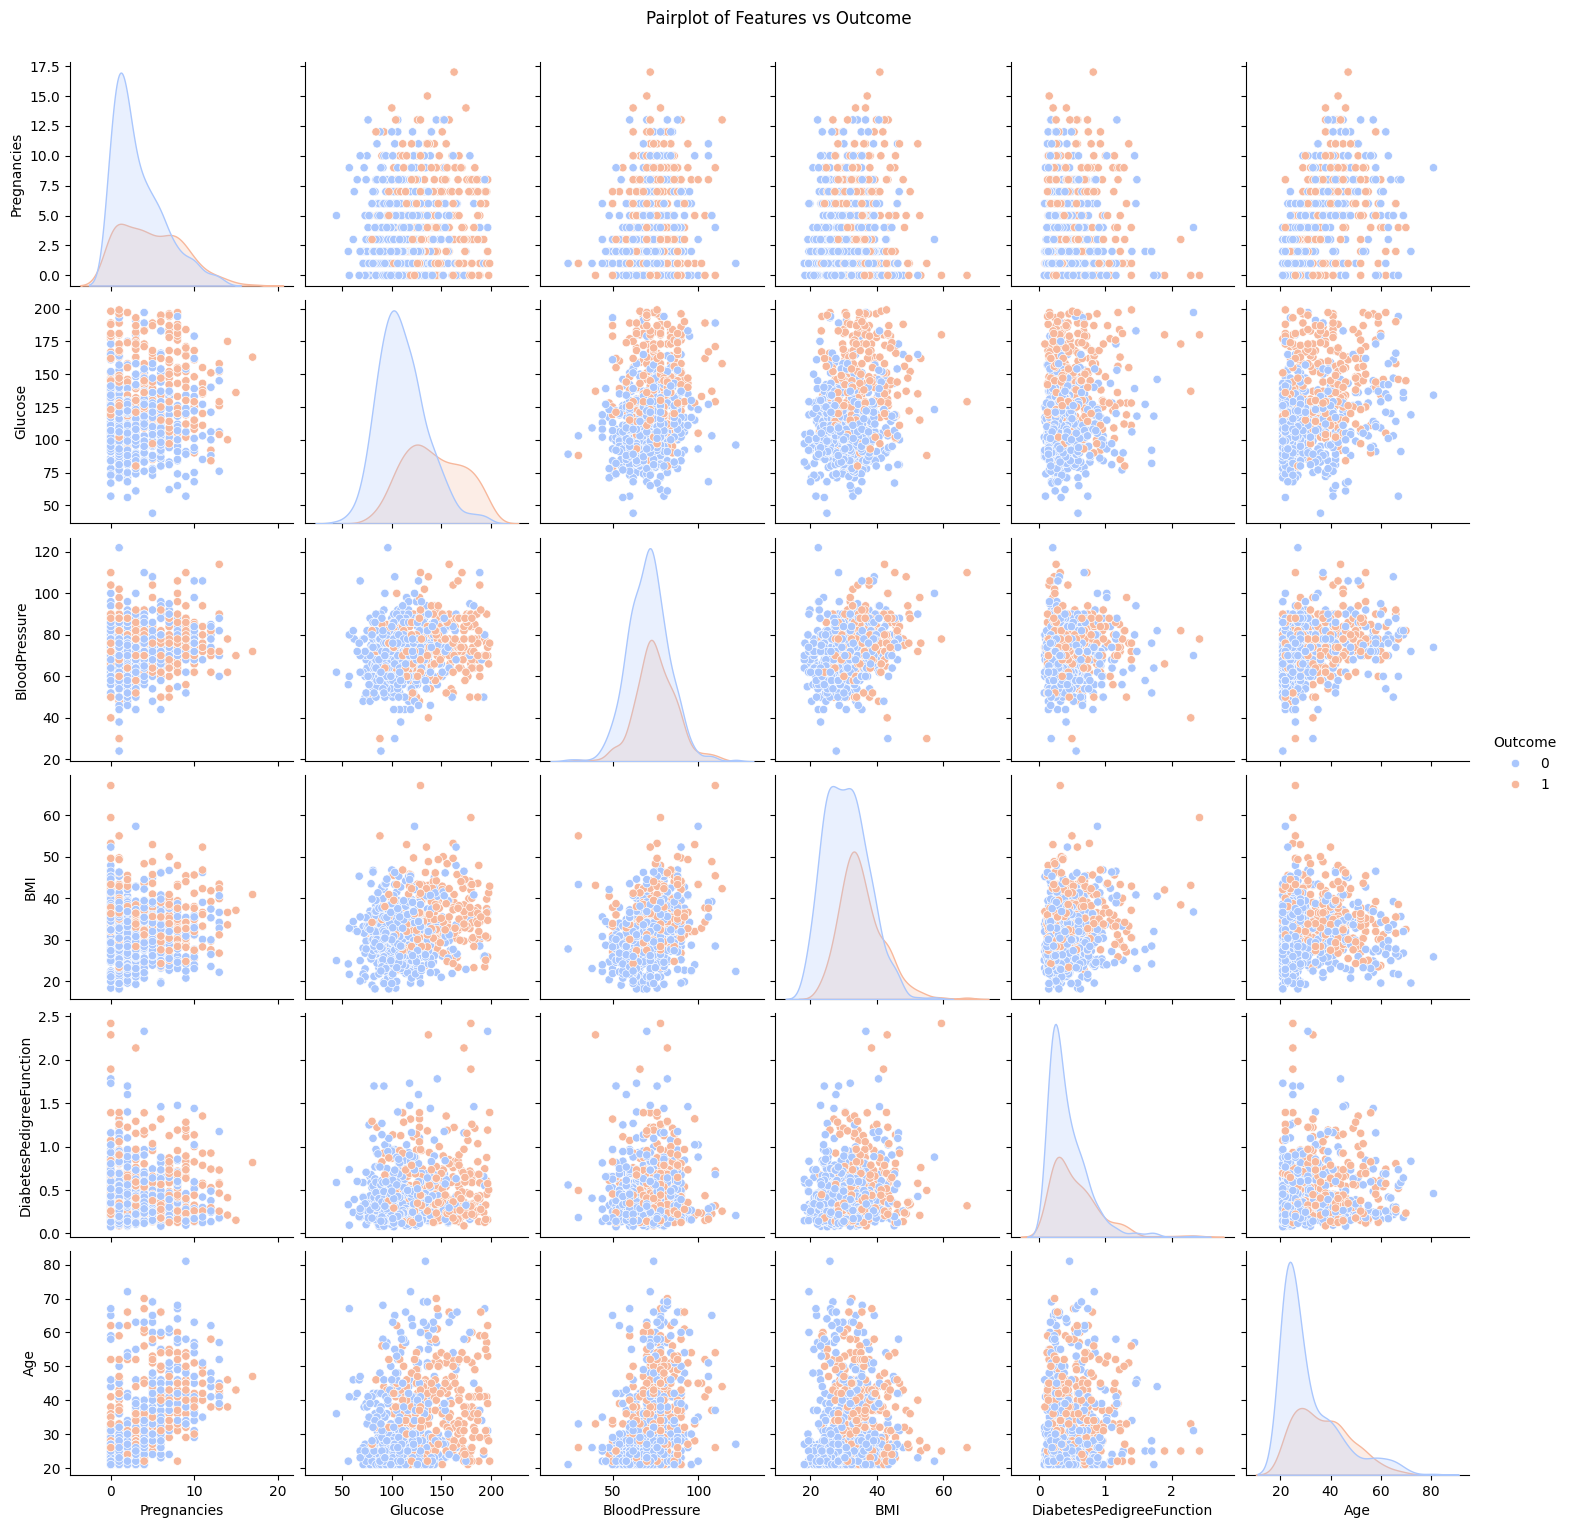

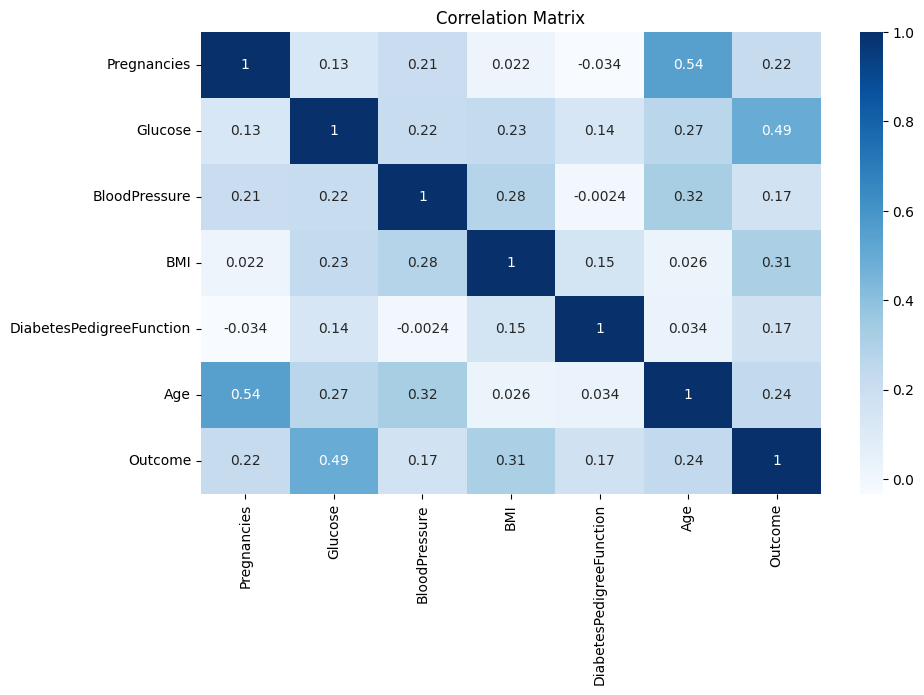

In [15]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = df[columns]

# 🔹 Check zeros in critical columns
critical_cols = ['Glucose', 'BloodPressure', 'BMI']
for col in critical_cols:
    print(f"\nZeros in {col}: {sum(df[col] == 0)}")

# 🔹 Replace zeros with median for Glucose, BloodPressure, BMI
for col in critical_cols:
    df[col] = df[col].replace(0, df[col].median())

# 🔹 Histograms for all features
df.hist(bins=15, figsize=(15,10), color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()

# 🔹 Boxplots to check outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(columns[:-1], 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 🔹 Countplot of Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title("Outcome Distribution (0=No, 1=Yes)")
plt.show()

# 🔹 Pairplot to see relationships
sns.pairplot(df, hue='Outcome', palette='coolwarm')
plt.suptitle("Pairplot of Features vs Outcome", y=1.02)
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [16]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [19]:
X_train

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
60,2,84,72,32.0,0.304,21
618,9,112,82,28.2,1.282,50
346,1,139,46,28.7,0.654,22
294,0,161,50,21.9,0.254,65
231,6,134,80,46.2,0.238,46
...,...,...,...,...,...,...
71,5,139,64,28.6,0.411,26
106,1,96,122,22.4,0.207,27
270,10,101,86,45.6,1.136,38
435,0,141,72,42.4,0.205,29


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [21]:
X_train

array([[-0.52639686, -1.25688146, -0.01899526, -0.05024677, -0.49073479,
        -1.03594038],
       [ 1.58804586, -0.32605067,  0.8081742 , -0.59858988,  2.41502991,
         1.48710085],
       [-0.82846011,  0.57153617, -2.16963585, -0.52643947,  0.54916055,
        -0.94893896],
       ...,
       [ 1.8901091 , -0.69173419,  1.13904198,  1.91224437,  1.981245  ,
         0.44308379],
       [-1.13052335,  0.63802409, -0.01899526,  1.45048175, -0.78487662,
        -0.33992901],
       [-1.13052335,  0.10612077,  1.96621144, -1.42110454, -0.61552223,
        -1.03594038]])

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7662337662337663
[[84 15]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



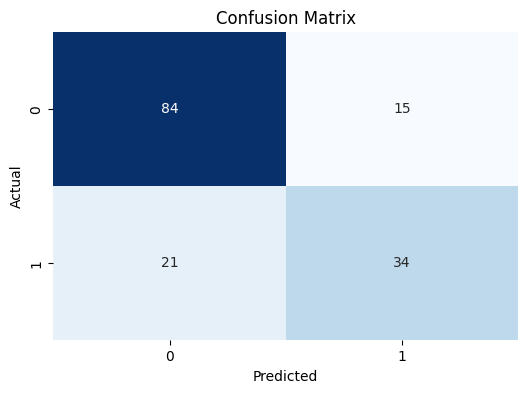

In [24]:

from sklearn.metrics import confusion_matrix
# 🔹 Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 🔹 Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.7662337662337663

Confusion Matrix:
 [[84 15]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



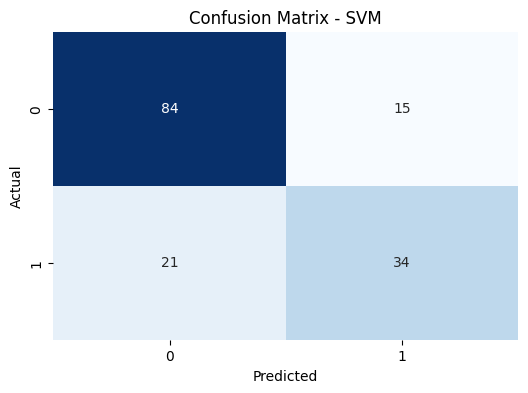

In [26]:
svm_model = SVC(kernel='linear', random_state=42)  # you can try 'rbf' kernel too
svm_model.fit(X_train, y_train)

# 🔹 Make Predictions
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

Accuracy: 0.7402597402597403

Confusion Matrix:
 [[78 21]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



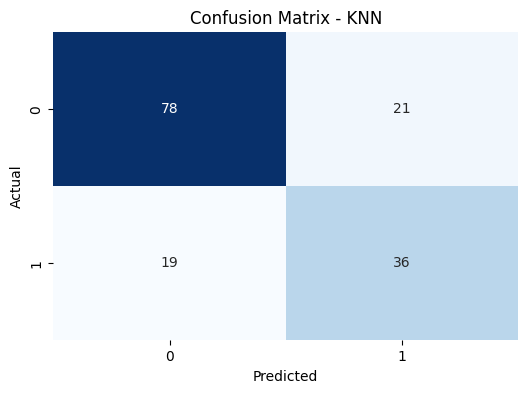

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change k (odd number preferred)
knn_model.fit(X_train, y_train)

# 🔹 Make Predictions
y_pred = knn_model.predict(X_test)

# 🔹 Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

Accuracy: 0.7012987012987013

Confusion Matrix:
 [[69 30]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



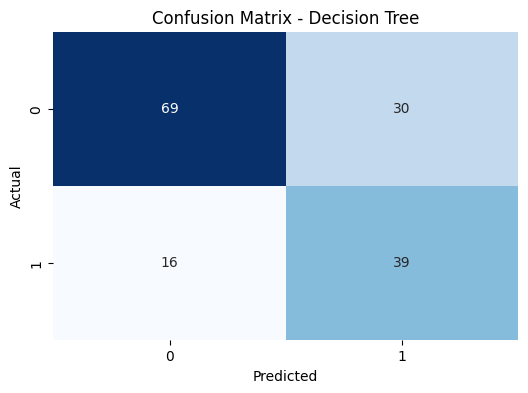

In [29]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # limit depth to avoid overfitting
dt_model.fit(X_train, y_train)

# 🔹 Make Predictions
y_pred = dt_model.predict(X_test)

# 🔹 Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [33]:
import pickle

# Save trained model
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save trained scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

print("✅ Pickle files generated: logreg_model.pkl and scaler.pkl")


✅ Pickle files generated: logreg_model.pkl and scaler.pkl
